# An introduction to neural nets and convnets with Keras

In [2]:
# setup imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import tqdm # for fancy progress bars
import keras
import ipywidgets as widgets

Using TensorFlow backend.


## A simple neural net with keras

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape = (2,)))
model.compile(optimizer=keras.optimizers.sgd(),loss="binary_crossentropy")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Get the (randomly initialized) weights

In [4]:
model.layers[0].get_weights()

[array([[ 0.67131746],
        [-0.36632013]], dtype=float32), array([0.], dtype=float32)]

Set the weights

In [5]:
weights = np.array([[0.8],[-1.0]])
bias = np.array([4.0])
model.layers[0].set_weights([weights, bias])

And predict

In [6]:
data = np.array([[1,2]])
model.predict(data)

array([[2.8]], dtype=float32)

We can also compute gradients (of anything w.r.t. anything!)

In [7]:
grads = keras.backend.gradients(model.output, model.weights)
f = keras.backend.function([model.input], grads)
myInput = np.array([[1,3]])
gradients_of_parameters = f([myInput])
print("Gradients of the output w.r.t. the weights:\n",gradients_of_parameters[0])
print("Gradients of the output w.r.t. the bias:\n",gradients_of_parameters[1])

Gradients of the output w.r.t. the weights:
 [[1.]
 [3.]]
Gradients of the output w.r.t. the bias:
 [1.]


Let's make a dataset for classification

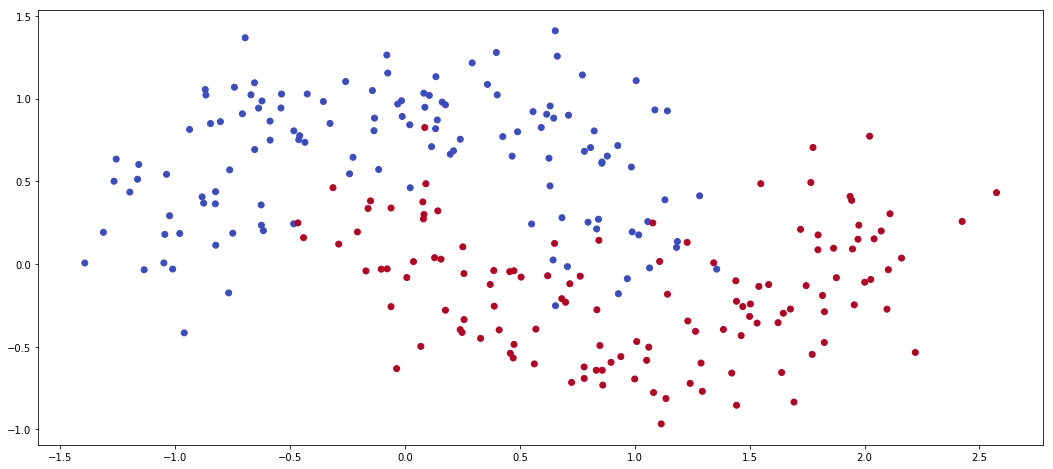

In [8]:
X,y = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.25, random_state=None)
fig,ax = plt.subplots(figsize=(18,8))         
ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")

xgrid,ygrid = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100),
                          np.linspace(np.min(X[:,1]),np.max(X[:,1]),100))
gridinputs = np.vstack((xgrid.flatten(),ygrid.flatten())).T

A simple net

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_shape = (2,)))
model.compile(optimizer=keras.optimizers.Adam(lr=0.02),
                        loss="binary_crossentropy")

yhats = []
for i in tqdm.tqdm(list(range(10))):
    yhat = model.predict(gridinputs)
    yhat = np.reshape(yhat,xgrid.shape)
    yhats.append(yhat)
    model.fit(X,y,verbose = 0,epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


In [10]:
extent = (np.min(X[:,0]),np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))

@widgets.interact(i=widgets.IntSlider(min=0,max=len(yhats)-1,step=1,value=0))
def f(i):
    fig,ax = plt.subplots(figsize=(18,9))         
    him = ax.imshow(yhats[i], vmin = 0, vmax = 1, cmap = "coolwarm",
              extent = extent,
              alpha = 0.5, origin = "lower")
    ax.contour(yhats[i], [0.5], extent = extent)
    ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")
    ax.axis("off")
    ax.autoscale(enable=True, axis='both', tight=True)
    plt.colorbar(him)

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

Let's try a larger net

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100,input_shape = (2,)))
model.add(keras.layers.Activation("sigmoid"))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Activation("sigmoid"))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation("sigmoid"))
model.compile(optimizer=
                    keras.optimizers.Adam(lr=0.01),
                    loss="binary_crossentropy")

yhats = []
for i in tqdm.tqdm(list(range(80))):
    yhat = model.predict(gridinputs)
    yhat = np.reshape(yhat,xgrid.shape)
    yhats.append(yhat)
    model.fit(X,y,verbose = 0,epochs=40)

100%|██████████| 80/80 [00:33<00:00,  2.54it/s]


In [12]:
extent = (np.min(X[:,0]),np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1]))

@widgets.interact(i=widgets.IntSlider(min=0,max=len(yhats)-1,step=1,value=0))
def f(i):
    fig,ax = plt.subplots(figsize=(18,9))         
    him = ax.imshow(yhats[i], vmin = 0, vmax = 1, cmap = "coolwarm",
              extent = extent,
              alpha = 0.5, origin = "lower")
    ax.contour(yhats[i], [0.5], extent = extent)
    ax.scatter(X[:,0],X[:,1],c = y.astype(float), cmap="coolwarm")
    ax.axis("off")
    ax.autoscale(enable=True, axis='both', tight=True)
    plt.colorbar(him)
    

interactive(children=(IntSlider(value=0, description='i', max=79), Output()), _dom_classes=('widget-interact',…

## Part 2: let's create a basic convnet

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(1,(2,2),input_shape = (3,3,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.compile(optimizer=
              keras.optimizers.sgd(),
              loss="binary_crossentropy")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 1)           5         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
img = np.array([
    [1,0,0],
    [0,2,0],
    [0,0,3]
])
weights = np.array([
    [0,1],
    [2,3]
])
model.layers[0].set_weights([
    weights[:,:,np.newaxis,np.newaxis],
    np.array([0.5])
])
model.predict(img[np.newaxis,:,:,np.newaxis])[0,:,:,0]

array([[9.5]], dtype=float32)

In [15]:
grads = keras.backend.gradients(model.output, model.weights)
f = keras.backend.function([model.input], [grads[0]])
f([img[np.newaxis,:,:,np.newaxis]])[0][:,:,0,0]

array([[2., 0.],
       [0., 3.]], dtype=float32)

A more complex quiz

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(2,(2,2),input_shape = (3,3,3)))
#model.add(keras.layers.MaxPool2D((2,2)))
model.compile(optimizer=
              keras.optimizers.sgd(),
              loss="binary_crossentropy")

model.count_params()

img0 = np.array([[0, 1, 0],
                 [0, 0, 0],
                 [0, 0, 0]])

img1 = np.array([[0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0]])

img2 = np.array([[0, 0, 0],
                 [0, 0, 0],
                 [0, 0,-2]])

img = np.stack((img0,img1,img2),axis=2)


weights00 = np.array([[0,1],
                      [2,3]])
weights01 = np.array([[0,0],
                      [0,1]])

weights10 = np.array([[0,0],
                      [0,0]])
weights11 = np.array([[0,0],
                      [0,0]])

weights20 = np.array([[0,1],
                      [2,3]])
weights21 = np.array([[5,4],
                      [8,7]])

weights = np.stack(
    (np.stack((weights00,weights10,weights20), axis=2),
     np.stack((weights01,weights11,weights21), axis=2)),
    axis = 3)

model.layers[0].set_weights([
    weights,
    np.array([0,0])
])
out = model.predict(img[np.newaxis,:,:,:])[0,:,:,:]
print(out[:,:,0])
print(out[:,:,1])

[[ 1.  0.]
 [ 0. -6.]]
[[  0.   0.]
 [  0. -14.]]
